# Model Evaluation
This is the evaluation of the exam score predictor

## Step 1
Load the required dependencies.

In [6]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
##plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

## Step 2
Load the model for testing

In [7]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))

##  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [8]:
import pandas as pd

# Load the test data CSV file
test_data = pd.read_csv('1.4.1.testing_data.csv')

# Extract the Hours_Studied feature and target variable
hours_studied = test_data['Hours_Studied']
exam_score = test_data['Exam_Score']

# Display the first few rows of the extracted data
print("Hours_Studied and Exam_Score from the test data:")
print(test_data[['Hours_Studied', 'Exam_Score']].head())

Hours_Studied and Exam_Score from the test data:
   Hours_Studied  Exam_Score
0       0.116279          61
1       0.511628          68
2       0.488372          67
3       0.348837          62
4       0.441860          66


## Step 4
Plot the test data features, targets and linear regression model to visually evaluate the model.

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


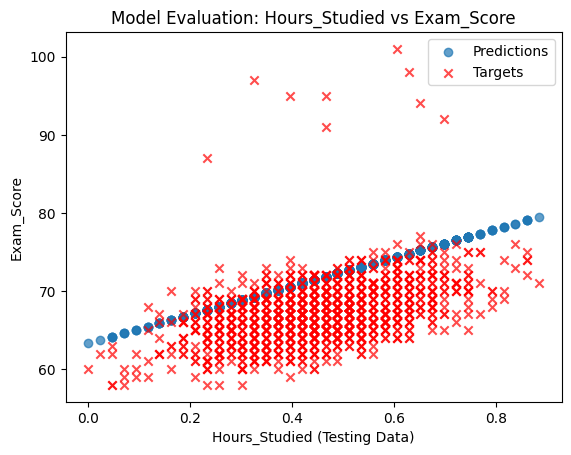

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the test data
test_data = pd.read_csv('1.4.1.testing_data.csv')

# Define x_test and y_test
x_test = test_data[['Hours_Studied']]  # Ensure x_test is a DataFrame
y_test = test_data['Exam_Score']

# Generate predictions
y_pred = model_A.predict(x_test)

# Plot the test data features, targets, and predictions
plt.scatter(x_test, y_pred, label='Predictions', alpha=0.7)
plt.scatter(x_test, y_test, marker='x', c='r', label='Targets', alpha=0.7)
plt.title("Model Evaluation: Hours_Studied vs Exam_Score")
plt.xlabel("Hours_Studied (Testing Data)")
plt.ylabel("Exam_Score")
plt.legend()
plt.show()

## Step 5
Use the 'score' method of the LinearRegression class to return a score based evaluation of the models accuracy or performance.

In [10]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: -0.978933809560459


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Multivariable Linear Regression

In [11]:
filename = 'my_saved_model_v3sav'
model_C = pickle.load(open(filename, 'rb'))

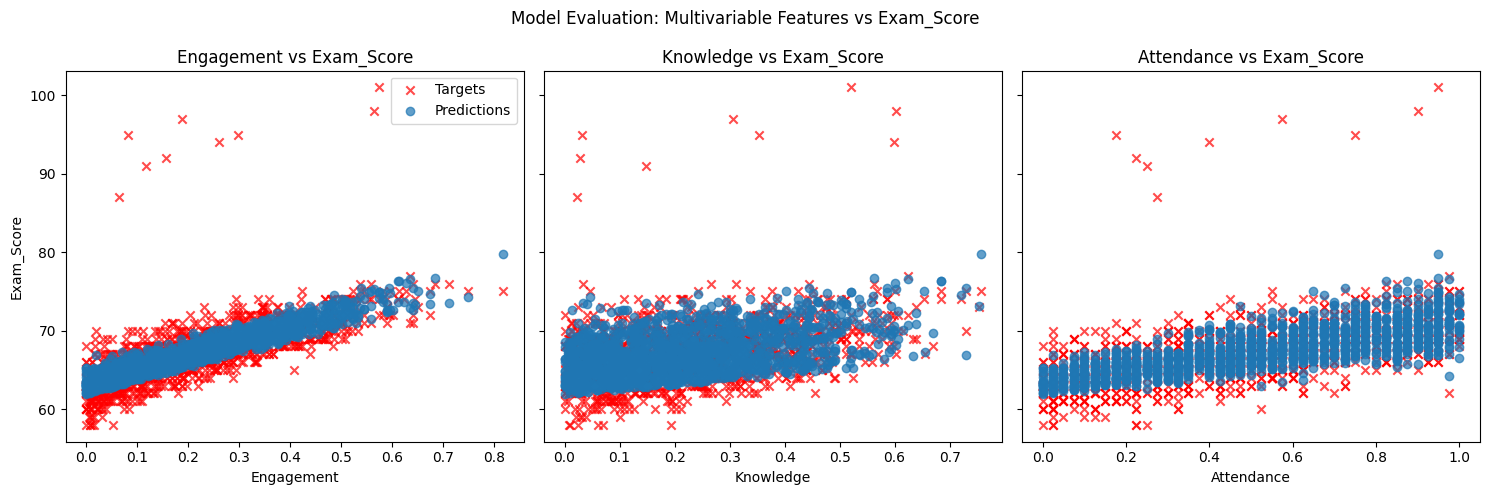

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

filename = 'my_saved_model_v3sav'
model_C = pickle.load(open(filename, 'rb'))

# Load the test data
test_data = pd.read_csv('1.4.1.testing_data.csv')

# Define x_test and y_test
x_test = test_data[['Engagement', 'Knowledge', 'Attendance']]  # Ensure x_test is a DataFrame
y_test = test_data['Exam_Score']

# Generate predictions
y_pred = model_C.predict(x_test)

# Plot the test data features, targets, and predictions
fig, ax = plt.subplots(1, x_test.shape[1], figsize=(15, 5), sharey=True)

for i, feature in enumerate(x_test.columns):
    ax[i].scatter(x_test[feature], y_test, label='Targets', alpha=0.7, marker='x', c='r')
    ax[i].scatter(x_test[feature], y_pred, label='Predictions', alpha=0.7)
    ax[i].set_xlabel(feature)
    ax[i].set_title(f"{feature} vs Exam_Score")

ax[0].set_ylabel("Exam_Score")
ax[0].legend()
fig.suptitle("Model Evaluation: Multivariable Features vs Exam_Score")
plt.tight_layout()
plt.show()

In [13]:

import pandas as pd

test_data = pd.read_csv('1.4.1.testing_data.csv')

mx_test = test_data[['Engagement', 'Knowledge', 'Attendance']]  # Features
my_test = test_data['Exam_Score']  # Target

# Evaluate the model's score
test_score = model_C.score(mx_test, my_test)
print(f'Test data score: {test_score:.2f}')

Test data score: 0.54


# Polynomial Linear Regression

In [14]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the saved model and polynomial transformer
model_filename = 'my_saved_model_v5.sav'
poly_filename = 'my_saved_poly_v5.pkl'

model_D = pickle.load(open(model_filename, 'rb'))
poly = pickle.load(open(poly_filename, 'rb'))

# Load the test data
test_data = pd.read_csv('1.4.1.testing_data.csv')

# Define the feature and target
x_test = np.array(test_data[['Engagement']])  # Ensure it's a 2D array
y_test = np.array(test_data['Exam_Score'])

# Transform the test data using the polynomial transformer
x_test_poly = poly.transform(x_test)

# Generate predictions
y_pred = model_D.predict(x_test_poly)

# Evaluate the model's performance
test_score = r2_score(y_test, y_pred)
print(f'Test data R² score: {test_score:.2f}')

Test data R² score: 0.49


# Multiple variable polynomial regression

In [15]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# Load the saved model and polynomial transformer
model_filename = 'my_saved_model_multivariable.sav'
poly_filename = 'my_saved_poly_multivariable.pkl'

model = pickle.load(open(model_filename, 'rb'))
poly = pickle.load(open(poly_filename, 'rb'))

# Load the test data
test_data = pd.read_csv('1.4.1.testing_data.csv')

# Define the features and target
x_test = np.array(test_data[['Engagement', 'Knowledge', 'Attendance']])  # Multiple features
y_test = np.array(test_data['Exam_Score'])

# Transform the test data using the polynomial transformer
x_test_poly = poly.transform(x_test)

# Generate predictions
y_pred = model.predict(x_test_poly)

# Evaluate the model's performance
test_score = r2_score(y_test, y_pred)
print(f'Test data R² score: {test_score:.2f}')

Test data R² score: 0.56
